In [12]:
import torch
import numpy as np
import sympy
from core.hamiltonian import ChainPendulum, EuclideanAndGravityDynamics, Animation2d, GravityHamiltonian
from torchdiffeq import odeint
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# points = torch.cat([torch.tensor([[0.],[0.]]),ic[0,0].T],dim=1)
# plt.plot(*points)
# plt.quiver(*ic[0,0].T,*ic[0,1].T)
# # plt.ylim(-3,0.5)
# # plt.xlim(-2,2.5)
# plt.axes().set_aspect('equal', 'datalim')

In [24]:
body = ChainPendulum(8,beams=False)
z0 = body.sample_initial_conditions(1)
z0[:,1] = body.M@z0[:,1]*2#*.01
bs,_,n,d = z0.shape
z0 = z0.reshape(bs,2*n*d)

In [25]:
z0.shape

torch.Size([1, 32])

In [26]:
ts = torch.linspace(0,50,1000)

In [27]:
dynamics = EuclideanAndGravityDynamics(body)
with torch.no_grad():
    zs = odeint(dynamics, z0, ts, rtol=1e-6, method='rk4').permute(1, 0, 2)

In [28]:
zs.shape

torch.Size([1, 1000, 32])

In [29]:
#GravityHamiltonian(body.M,body.Minv,None,zs[0])

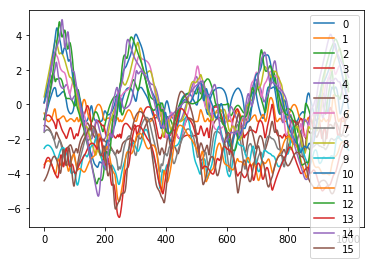

In [30]:
xt = zs[0,:,:n*d].reshape(len(ts),n,d).permute(1,2,0)
pt = zs[0,:,n*d:].reshape(len(ts),n,d).permute(1,2,0)
for i in range(n*d):
    plt.plot(zs[0,:,i])
plt.legend(range(n*d))

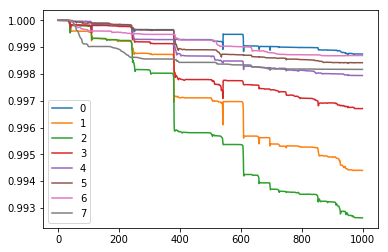

In [31]:
plt.plot((xt[0]**2).sum(0))
for i in range(n-1):
    plt.plot(((xt[1:]-xt[:-1])[i]**2).sum(0))
plt.legend(range(n))
#plt.yscale('log')

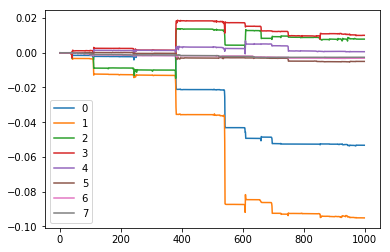

In [32]:
plt.plot((pt[0]*xt[0]).sum(0))
for i in range(n-1):
    plt.plot(((pt[1:]-pt[:-1])[i]*(xt[1:]-xt[:-1])[i]).sum(0))
plt.legend(range(n))
#plt.yscale('log')

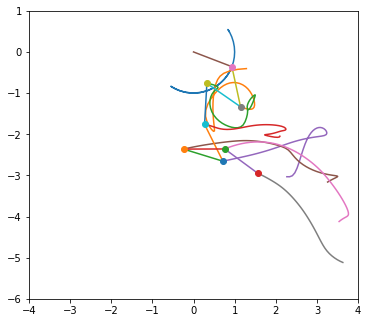

In [38]:
HTML(Animation2d(xt,body,box_lim=(-4,4,-6,1)).animate().to_html5_video())

In [42]:
body.body_graph.nodes[0]['m']

KeyError: 'm'

In [44]:
[n for n in body.body_graph.nodes.items()]

[(0, {'tether': tensor([0., 0.]), 'l': 1}), (1, {}), (2, {})]